In [1]:
import os
os.chdir("/data/yosef2/users/chenling/HarmonizationSCANVI")
import sys
sys.path.append("/data/yosef2/users/chenling/HarmonizationSCANVI")
save_path = '../MarrowTM'

In [2]:
from scvi.inference import UnsupervisedTrainer
from scvi.models.vae import VAE
import torch

In [3]:
use_cuda = True
from scvi.dataset.dataset import GeneExpressionDataset
from scvi.harmonization.utils_chenling import run_model
from scvi.harmonization.utils_chenling import entropy_batch_mixing
from scvi.metrics.clustering import select_indices_evenly
from scvi.dataset.dataset import SubsetGenes

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
import numpy as np
from umap import UMAP


In [4]:
plotname='MarrowTM'

In [5]:
from scvi.dataset.muris_tabula import TabulaMuris
dataset2 = TabulaMuris('droplet', save_path='/data/yosef2/scratch/chenling/scanvi_data/')
dataset1 = TabulaMuris('facs', save_path='/data/yosef2/scratch/chenling/scanvi_data/')
dataset1.subsample_genes(dataset1.nb_genes)
dataset2.subsample_genes(dataset2.nb_genes)

gene_dataset = GeneExpressionDataset.concat_datasets(dataset1, dataset2)
seurat_latent, batch_indices, labels, keys, stats = run_model('readSeurat', gene_dataset, dataset1, dataset2,
                                                       filename=plotname)
dataset1, dataset2, gene_dataset = SubsetGenes(dataset1, dataset2, gene_dataset, plotname)

File /data/yosef2/scratch/chenling/scanvi_data/TM_droplet_metadata.csv already downloaded
File /data/yosef2/scratch/chenling/scanvi_data/TM_facs_metadata.csv already downloaded
File /data/yosef2/scratch/chenling/scanvi_data/TM_droplet_mat.h5ad already downloaded
File /data/yosef2/scratch/chenling/scanvi_data/TM_facs_mat.h5ad already downloaded
File /data/yosef2/scratch/chenling/scanvi_data/TM_droplet_metadata.csv already downloaded
File /data/yosef2/scratch/chenling/scanvi_data/TM_facs_metadata.csv already downloaded
File /data/yosef2/scratch/chenling/scanvi_data/TM_droplet_mat.h5ad already downloaded
File /data/yosef2/scratch/chenling/scanvi_data/TM_facs_mat.h5ad already downloaded
True
Downsampling from 20508 to 17802 genes
Downsampling from 5351 to 5351 cells
Downsampling from 20508 to 14687 genes
Downsampling from 4112 to 4112 cells
Keeping 14590 genes
Downsampling from 17802 to 1804 genes
Downsampling from 5351 to 5351 cells
Downsampling from 14687 to 1804 genes
Downsampling from 

In [11]:
np.mean(dataset2.labels.ravel()==np.where(dataset2.cell_types=='nan')[0][0])

0.11186770428015565

In [10]:
np.mean(dataset1.labels.ravel()==np.where(dataset1.cell_types=='nan')[0][0])

0.05868062044477668

In [12]:
np.mean(gene_dataset.labels.ravel()==np.where(gene_dataset.cell_types=='nan')[0][0])

0.08179224347458523

(array([1.08849538e+00, 1.63678952e+00, 2.13854947e+00, 1.71974177e+00,
        8.45708306e-01, 6.29223165e-01, 2.28624494e-01, 2.83251586e-02,
        2.02322561e-03, 2.02322561e-03]),
 array([0.06353503, 0.18373451, 0.30393399, 0.42413346, 0.54433294,
        0.66453242, 0.7847319 , 0.90493137, 1.02513085, 1.14533033,
        1.26552981]),
 <a list of 10 Patch objects>)

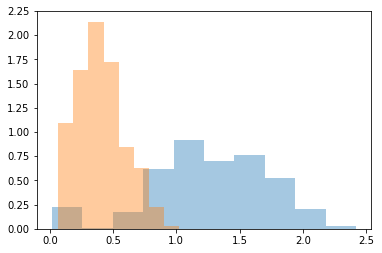

In [28]:
plt.hist(np.mean(np.log(dataset1.X.todense()+1),axis=1),alpha=0.4,density=True)
plt.hist(np.mean(np.log(dataset2.X.todense()+1),axis=1),alpha=0.4,density=True)

In [149]:
seurat_latent, batch_indices, labels, keys, stats = run_model('readSeurat', gene_dataset, dataset1, dataset2,
                                                       filename=plotname)


In [6]:
sorted_key = [
    'hematopoietic precursor cell','Slamf1-positive multipotent progenitor cell','Slamf1-negative multipotent progenitor cell',
    'common lymphoid progenitor',
    'immature T cell','T cell','regulatory T cell',
    'immature NK T cell','immature natural killer cell','pre-natural killer cell','mature natural killer cell',
    'Fraction A pre-pro B cell','early pro-B cell','late pro-B cell','precursor B cell','immature B cell','naive B cell','B cell',
    'granulocyte monocyte progenitor cell','granulocytopoietic cell','granulocyte',
    'promonocyte','monocyte',
    'megakaryocyte-erythroid progenitor cell','proerythroblast', 'erythroblast',
    'basophil',
    'macrophage',
    'nan']

key_order = [list(keys).index(x) for x in sorted_key]


colors = sns.cubehelix_palette(3, start=0,rot=0,light=0.65,dark=0.3,hue=1) + \
sns.cubehelix_palette(1,start=2.8,rot=0,light=0.65, dark=0.3,hue=1) + \
sns.cubehelix_palette(3, start=0.3,rot=0, light=0.65, dark=0.3,hue=1) + \
sns.cubehelix_palette(4, start=2.5,rot=0, light=0.65, dark=0.3,hue=1) + \
sns.cubehelix_palette(7,start=0.6,rot=0, light=0.65, dark=0.3,hue=1) + \
sns.cubehelix_palette(3,start=2.0,rot=0, light=0.65, dark=0.3,hue=1) + \
sns.cubehelix_palette(2,start=0.9,rot=0, light=0.65, dark=0.3,hue=1) + \
sns.cubehelix_palette(3,start=1.8,rot=0, light=0.65, dark=0.3,hue=1) + \
sns.cubehelix_palette(1,start=1.2,rot=0, light=0.65, dark=0.3,hue=1) + \
sns.cubehelix_palette(1,start=1.5,rot=0, light=0.65, dark=0.3,hue=1) + \
sns.light_palette('gray',1,reverse=True)



# Train model with NB

In [7]:
vae = VAE(gene_dataset.nb_genes, n_batch=gene_dataset.n_batches, n_labels=gene_dataset.n_labels,
              n_hidden=128, n_latent=10, n_layers=2, dispersion='gene',
              reconstruction_loss='nb')
trainer = UnsupervisedTrainer(vae, gene_dataset, train_size=1.0)
filename = '../MarrowTM/vae.nb.rep0.pkl'
trainer.model.load_state_dict(torch.load(filename))

full_nb = trainer.create_posterior(trainer.model, gene_dataset, indices=np.arange(len(gene_dataset)))

In [8]:
latent, batch_indices, labels = full_nb.sequential().get_latent()

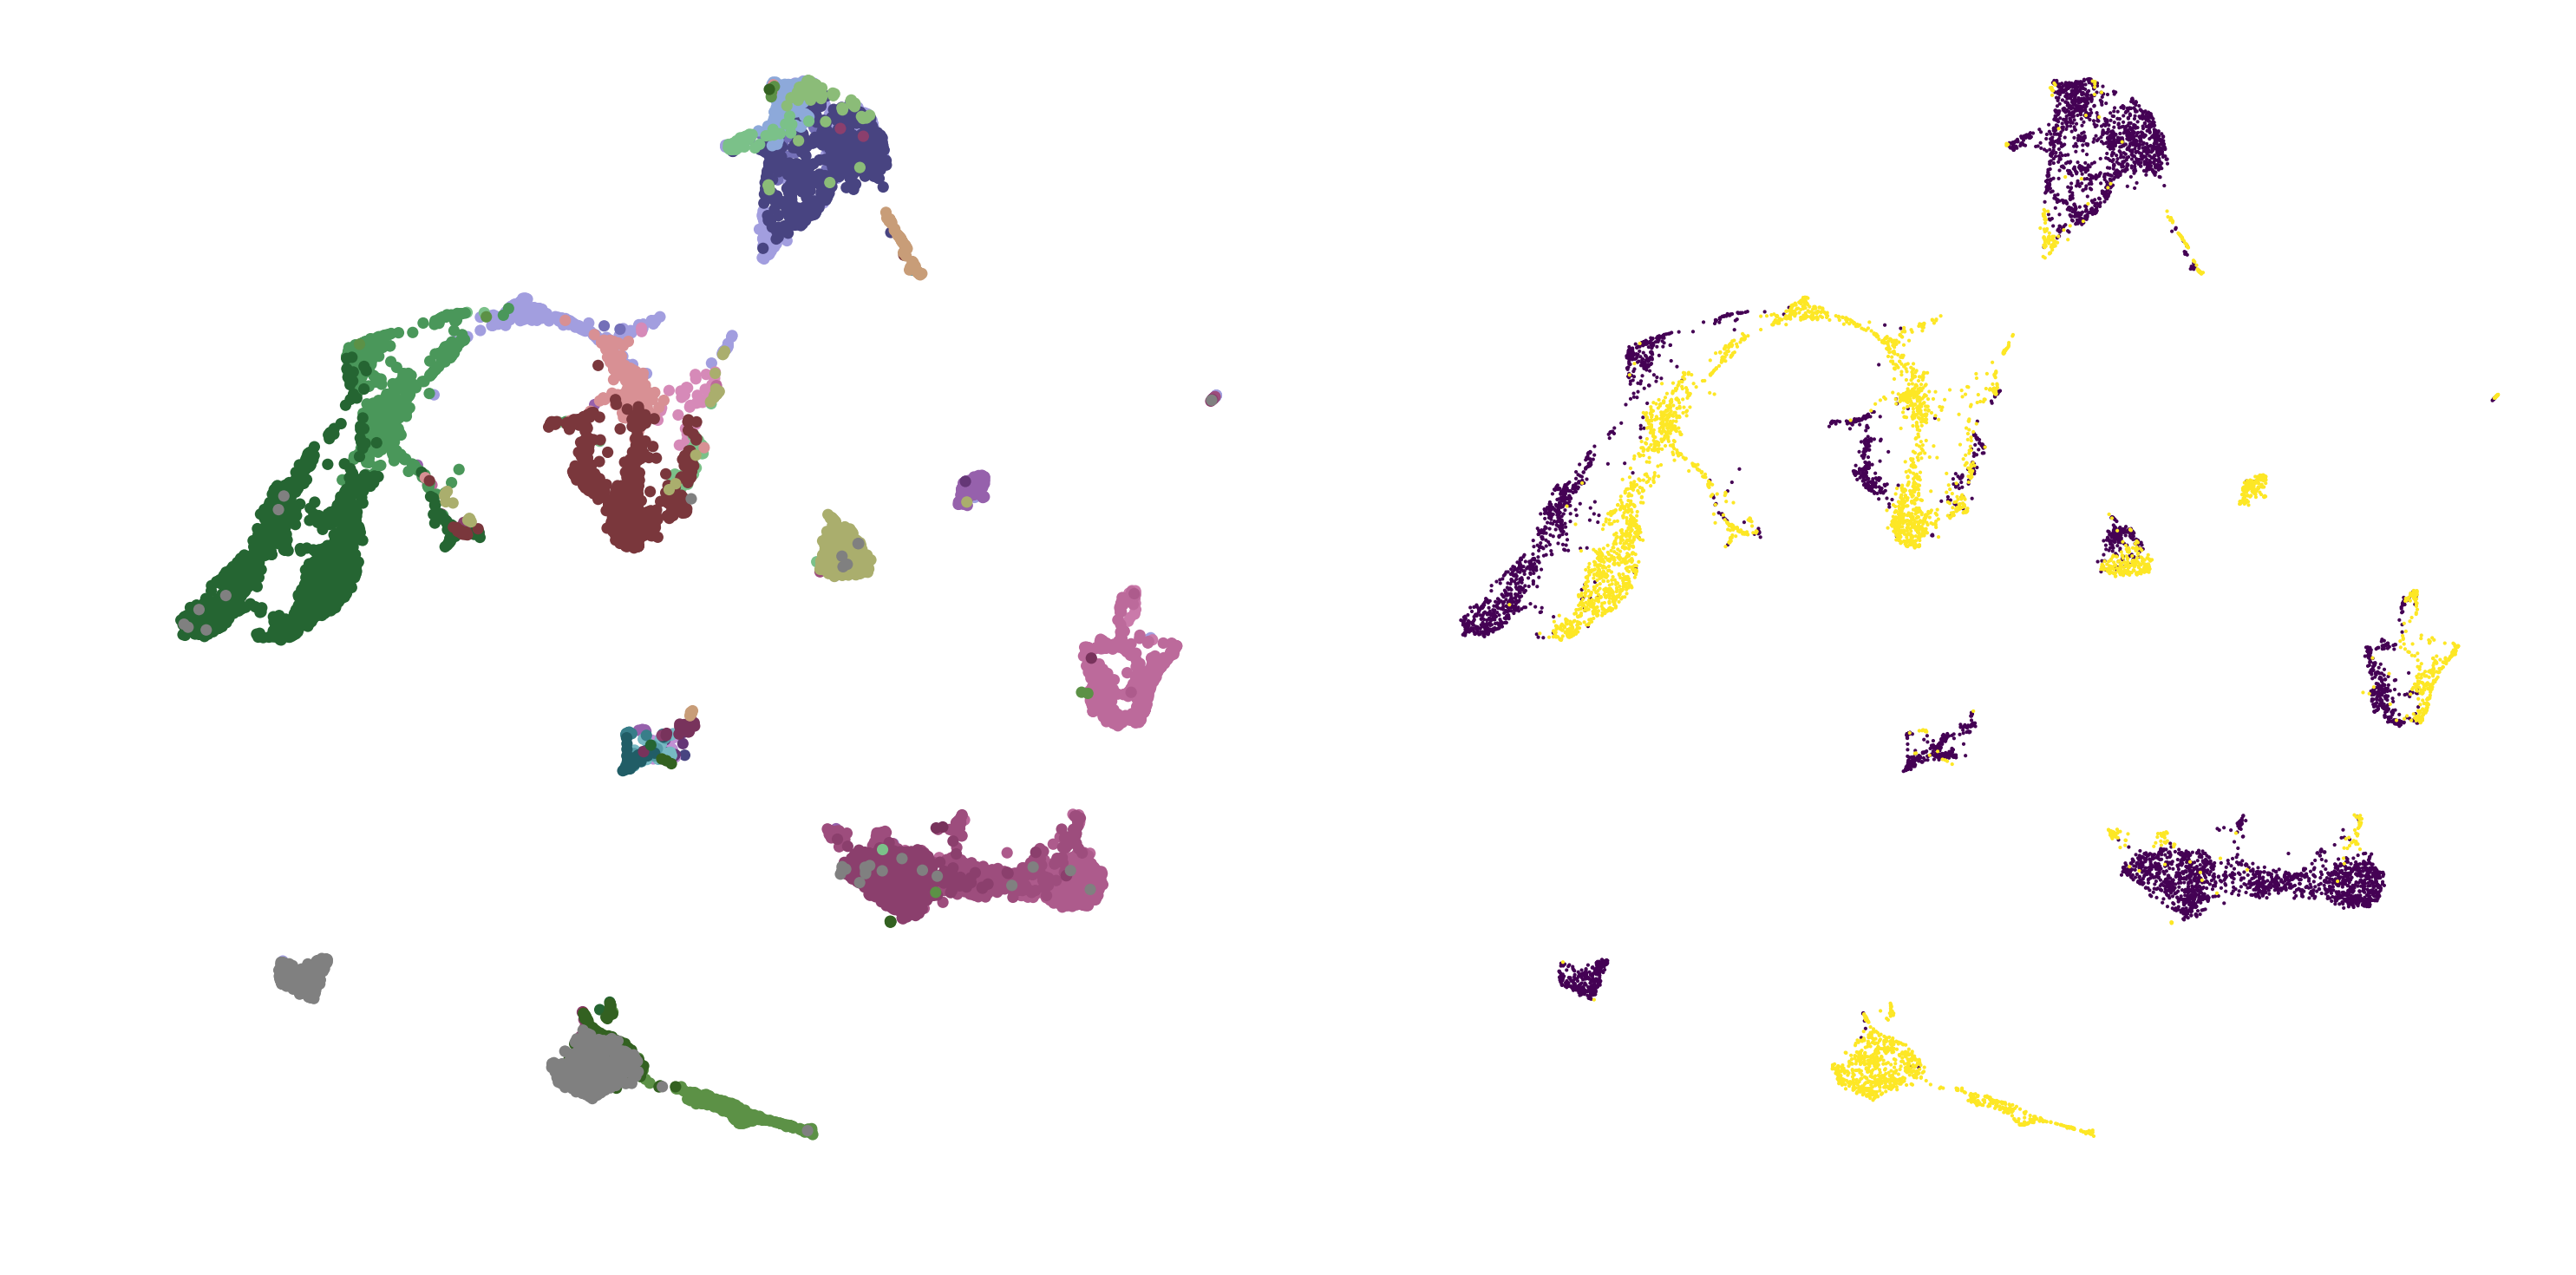

In [9]:
latent_u = UMAP(spread=2).fit_transform(latent)
plt.figure(figsize=(10, 5), dpi= 300, facecolor='w', edgecolor='k')
plt.subplot('121')
for i, k in enumerate(key_order):
    plt.scatter(latent_u[labels == k, 0], latent_u[labels == k, 1], label=keys[k],
               edgecolors='none',s=10, color=colors[i])
#     plt.legend(bbox_to_anchor=(1.1, 0.5), borderaxespad=0, fontsize='x-large')

plt.axis('off')
plt.tight_layout()
plt.subplot('122')
plt.scatter(latent_u[:, 0], latent_u[:, 1], c=batch_indices.ravel(), edgecolors='none',s=1)
plt.axis("off")
plt.tight_layout()
plt.savefig(save_path + 'latent_u.nb.pdf')

# Train with Zinb

In [10]:
vae = VAE(gene_dataset.nb_genes, n_batch=gene_dataset.n_batches, n_labels=gene_dataset.n_labels,
              n_hidden=128, n_latent=10, n_layers=2, dispersion='gene',
              reconstruction_loss='zinb')
trainer = UnsupervisedTrainer(vae, gene_dataset, train_size=1.0)
# trainer.train(n_epochs=100)
# torch.save(trainer.model.state_dict(), '../MarrowTM/vae.zinb.gene-batch.pkl')
filename = '../MarrowTM/vae.zinb.rep0.pkl'
trainer.model.load_state_dict(torch.load(filename))
full = trainer.create_posterior(trainer.model, gene_dataset, indices=np.arange(len(gene_dataset)))
latent, batch_indices, labels = full.sequential().get_latent()

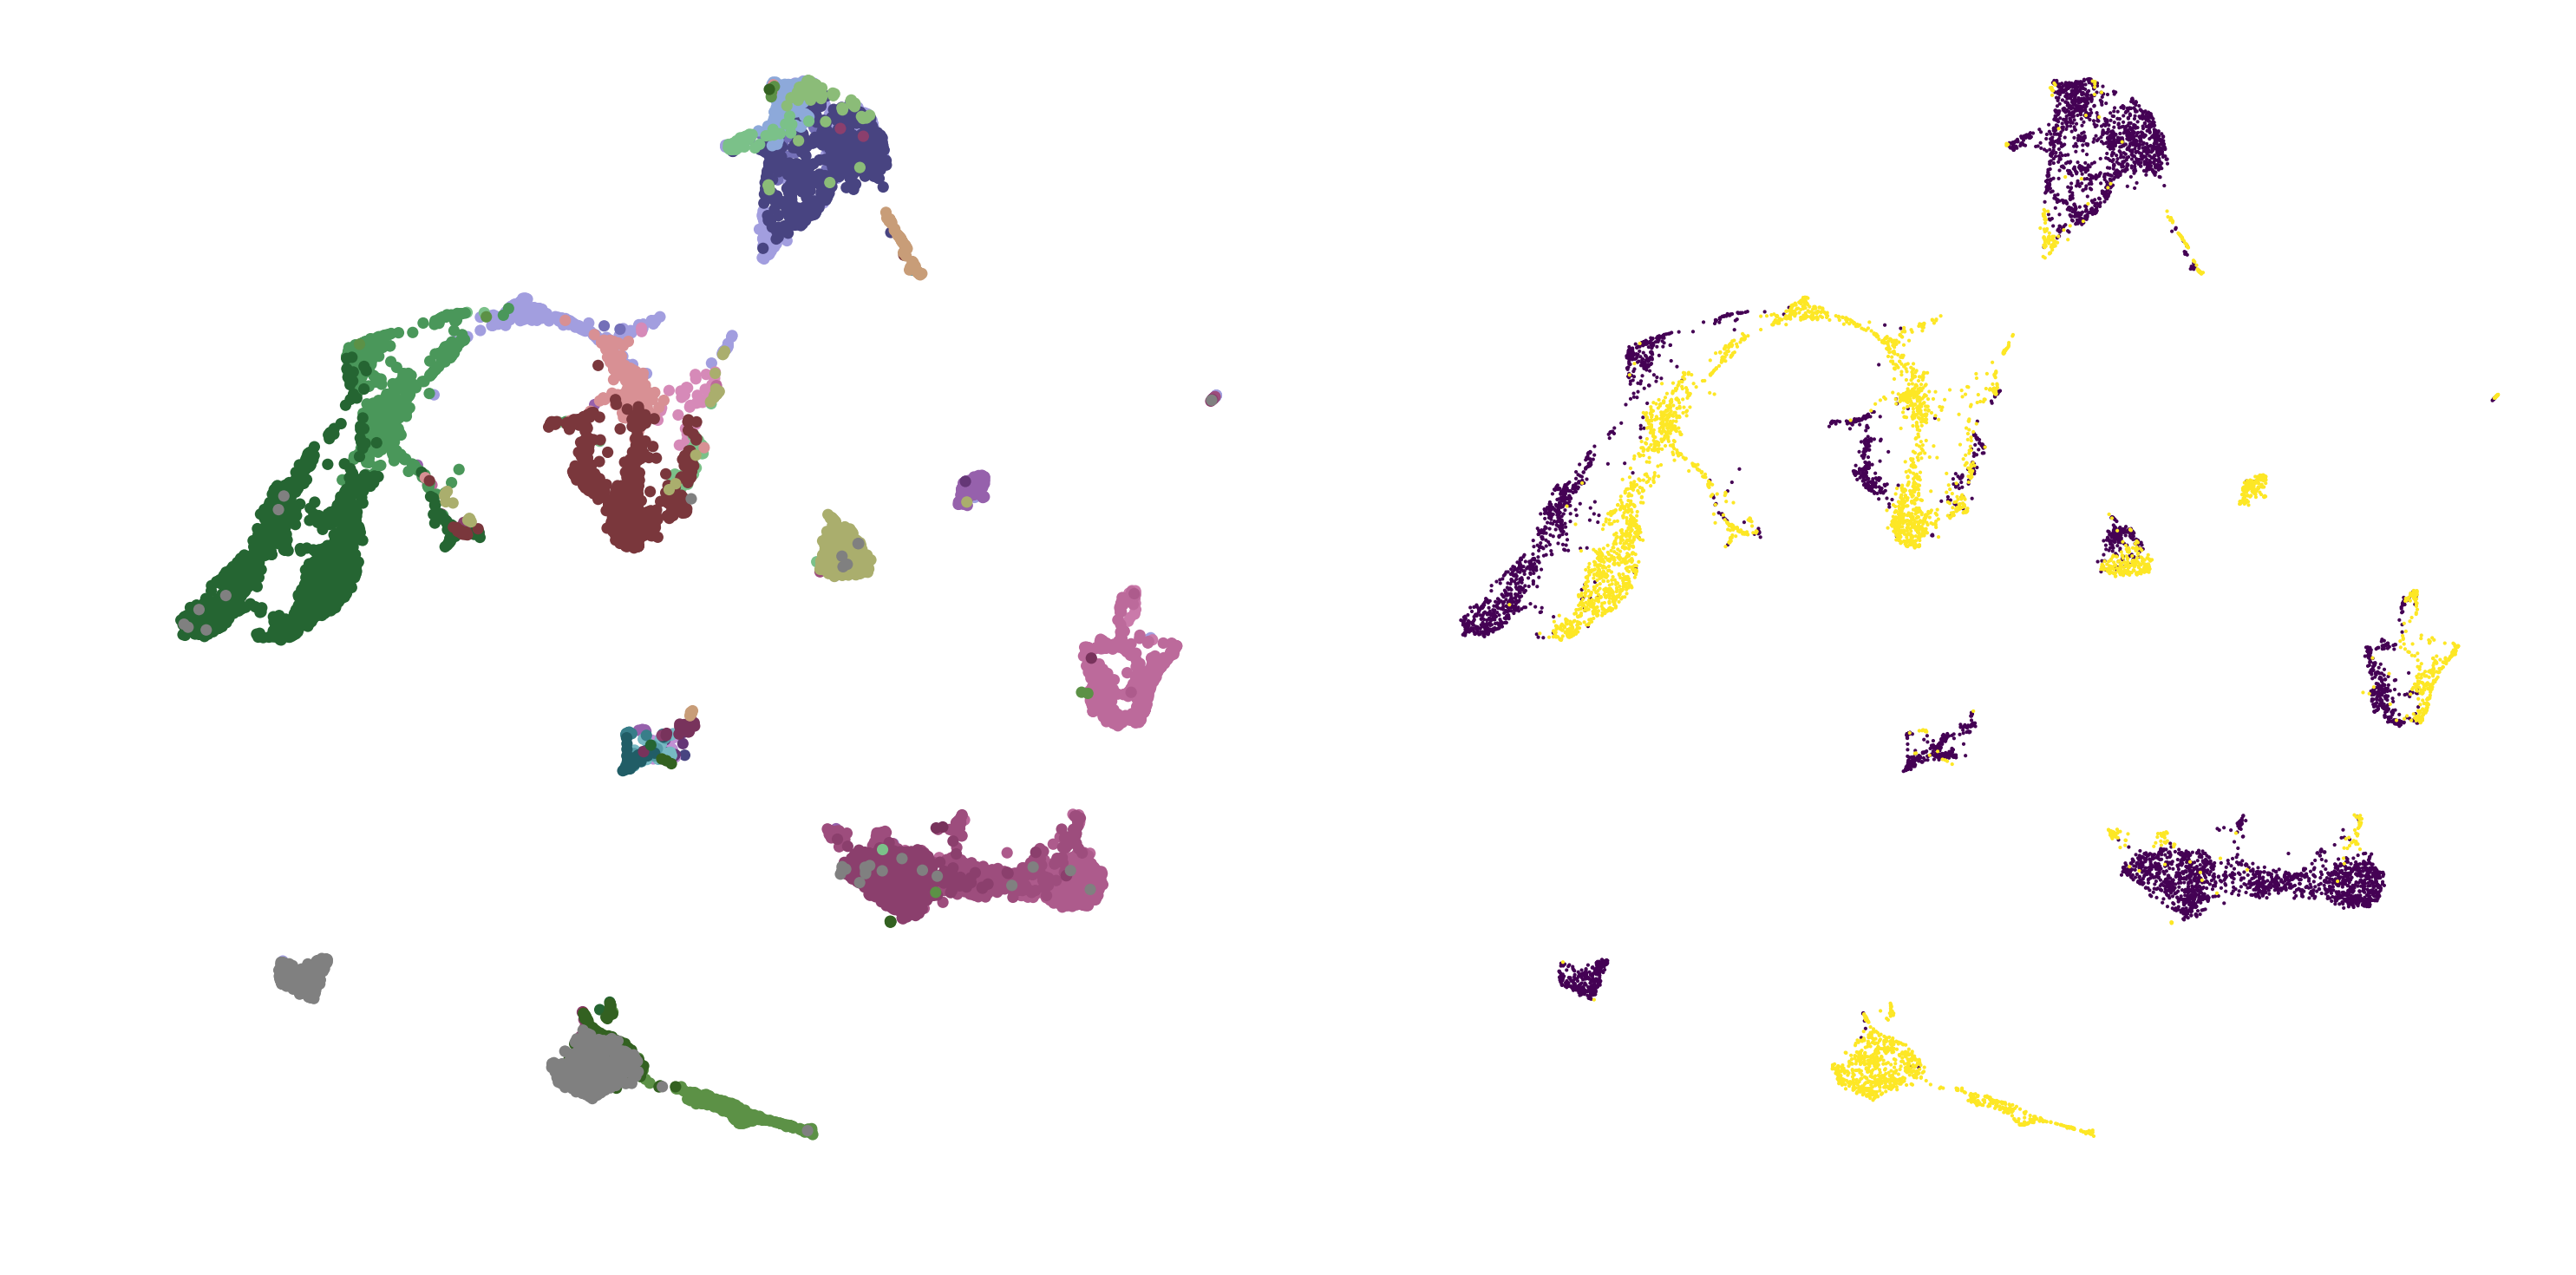

In [11]:
# latent_u = UMAP(spread=2).fit_transform(latent)
plt.figure(figsize=(10, 5), dpi= 300, facecolor='w', edgecolor='k')
plt.subplot('121')
for i, k in enumerate(key_order):
    plt.scatter(latent_u[labels == k, 0], latent_u[labels == k, 1], label=keys[k],
               edgecolors='none',s=10, color=colors[i])
#     plt.legend(bbox_to_anchor=(1.1, 0.5), borderaxespad=0, fontsize='x-large')

plt.axis('off')
plt.tight_layout()
plt.subplot('122')
plt.scatter(latent_u[:, 0], latent_u[:, 1], c=batch_indices.ravel(), edgecolors='none',s=1)
plt.axis("off")
plt.tight_layout()
plt.savefig(save_path + 'latent_u.zinb.pdf')

# connected pairs and disconnected pairs


In [15]:
[x for x in dataset1.cell_types if x in dataset2.cell_types ]

['basophil',
 'granulocyte',
 'granulocytopoietic cell',
 'hematopoietic precursor cell',
 'immature B cell',
 'late pro-B cell',
 'macrophage',
 'monocyte',
 'nan']

In [12]:
sorted_key = [
    'hematopoietic precursor cell','Slamf1-positive multipotent progenitor cell','Slamf1-negative multipotent progenitor cell',
    'common lymphoid progenitor',
    'immature T cell','T cell','regulatory T cell',
    'immature NK T cell','immature natural killer cell','pre-natural killer cell','mature natural killer cell',
    'Fraction A pre-pro B cell','early pro-B cell','late pro-B cell','precursor B cell','immature B cell','naive B cell','B cell',
    'granulocyte monocyte progenitor cell','granulocytopoietic cell','granulocyte',
    'promonocyte','monocyte',
    'megakaryocyte-erythroid progenitor cell','proerythroblast', 'erythroblast',
    'basophil',
    'macrophage',
    'nan']


In [144]:
connected = [['granulocyte monocyte progenitor cell','promonocyte'],
            ['promonocyte','monocyte'],
            ['granulocyte monocyte progenitor cell','granulocytopoietic cell'],
            ['granulocytopoietic cell','granulocyte'],
            ['megakaryocyte-erythroid progenitor cell','proerythroblast'],
            ['proerythroblast', 'erythroblast'],
            ['early pro-B cell','late pro-B cell'],
            ['precursor B cell','immature B cell'],
            ['immature B cell','naive B cell'],
            ['naive B cell','B cell']]
                 

disconnected = [['granulocyte monocyte progenitor cell','monocyte'],
                ['promonocyte','granulocytopoietic cell'],
                ['granulocyte monocyte progenitor cell','granulocyte'],
                ['granulocytopoietic cell','promonocyte'],
                ['megakaryocyte-erythroid progenitor cell','erythroblast'],
                ['early pro-B cell','precursor B cell'],
                ['late pro-B cell','immature B cell'],
                ['precursor B cell','naive B cell'],
                ['immature B cell', 'B cell']]

In [145]:
from sklearn.neighbors import NearestNeighbors

In [146]:
K = [5,10,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

In [186]:
def betweenedges(latent, pairs,gene_dataset, K=K):
    res = []
    for k in K:
        nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(latent)
        G = nbrs.kneighbors_graph()
        nbetween = []
        for pair in pairs:
            A = np.asarray([gene_dataset.cell_types[x]==pair[0] for x in gene_dataset.labels.ravel()])
            nA = np.sum(A)
            B = np.asarray([gene_dataset.cell_types[x]==pair[1] for x in gene_dataset.labels.ravel()])
            nB = np.sum(B)
            nbetween.append(np.sum(G[B,:][:,A])/(nA+nB)/k + np.sum(G[A,:][:,B])/(nA+nB)/k)
        res.append(nbetween)
    return np.asarray(res)

In [187]:
scvi_good = betweenedges(latent, connected,gene_dataset)
scvi_bad = betweenedges(latent,disconnected, gene_dataset)
seurat_good = betweenedges(seurat_latent, connected,gene_dataset)
seurat_bad = betweenedges(seurat_latent,disconnected, gene_dataset)

In [189]:
scvi = []
seurat = []
for i in range(len(connected)):
    for j in range(len(disconnected)):
        scvi.append(scvi_good[:,i]/(scvi_good[:,i] + scvi_bad[:,j]))
        seurat.append(seurat_good[:,i]/(seurat_good[:,i] + seurat_bad[:,j]))

seurat = np.asarray(seurat)
scvi = np.asarray(scvi)

In [190]:
scvi.shape
seurat.shape
scvi.mean(axis=0)
scvi.std(axis=0)
seurat.mean(axis=0)
seurat.std(axis=0)

(90, 19)

In [ ]:
save_path = '../MarrowTM'

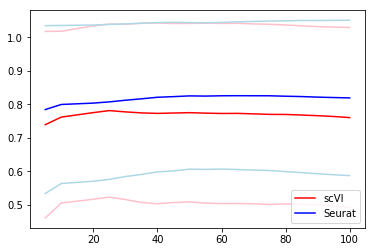

In [205]:
plt.plot(np.asarray(K),scvi.mean(axis=0),color='red')
plt.plot(np.asarray(K),seurat.mean(axis=0),color='blue')
plt.legend(['scVI','Seurat'])
plt.plot(np.asarray(K),scvi.mean(axis=0)-scvi.std(axis=0),color='pink')
plt.plot(np.asarray(K),seurat.mean(axis=0)-seurat.std(axis=0),color='lightblue')
plt.plot(np.asarray(K),scvi.mean(axis=0)+scvi.std(axis=0),color='pink')
plt.plot(np.asarray(K),seurat.mean(axis=0)+seurat.std(axis=0),color='lightblue')
plt.savefig(save_path + 'connection_ratio_wstd.pdf')

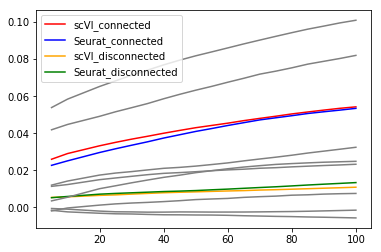

In [207]:
plt.plot(np.asarray(K),scvi_good.mean(axis=1),color='red')
plt.plot(np.asarray(K),seurat_good.mean(axis=1),color='blue')
plt.plot(np.asarray(K),scvi_bad.mean(axis=1),color='orange')
plt.plot(np.asarray(K),seurat_bad.mean(axis=1),color='green')
plt.legend(['scVI_connected','Seurat_connected','scVI_disconnected','Seurat_disconnected'])
plt.plot(np.asarray(K),scvi_good.mean(axis=1)-scvi_good.std(axis=1),color='gray')
plt.plot(np.asarray(K),scvi_good.mean(axis=1)+scvi_good.std(axis=1),color='gray')
plt.plot(np.asarray(K),scvi_bad.mean(axis=1)-scvi_bad.std(axis=1),color='gray')
plt.plot(np.asarray(K),scvi_bad.mean(axis=1)+scvi_bad.std(axis=1),color='gray')
plt.plot(np.asarray(K),seurat_good.mean(axis=1)-seurat_good.std(axis=1),color='gray')
plt.plot(np.asarray(K),seurat_good.mean(axis=1)+seurat_good.std(axis=1),color='gray')
plt.plot(np.asarray(K),seurat_bad.mean(axis=1)-seurat_bad.std(axis=1),color='gray')
plt.plot(np.asarray(K),seurat_bad.mean(axis=1)+seurat_bad.std(axis=1),color='gray')
plt.savefig(save_path + 'connections.pdf')